# Linear Regression in Python with Scikit-Learn

> If you had studied longer, would your overall scores get any better?

One way of answering this question is by having data on how long you studied for and what scores you got. We can then try to see if there is a pattern in that data, and if in that pattern, when you add to the hours, it also ends up adding to the scores percentage.

For instance, say you have an hour-score dataset, which contains entries such as 1.5h and 87.5% score. It could also contain 1.61h, 2.32h and 78%, 97% scores. The kind of data type that can have any intermediate value (or any level of 'granularity') is known as continuous data.

Another scenario is that you have an hour-score dataset which contains letter-based grades instead of number-based grades, such as A, B or C. Grades are clear values that can be isolated, since you can't have an A.23, A+++++++++++ (and to infinity) or A * e^12. The kind of data type that cannot be partitioned or defined more granularly is known as discrete data.

> Based on the modality (form) of your data - to figure out what score you'd get based on your study time - you'll perform regression or classification.

Regression is performed on continuous data, while classification is performed on discrete data. Regression can be anything from predicting someone's age, the house of a price, or value of any variable. Classification includes predicting what *class* something belongs to (such as whether a tumor is benign or malignant).

For both regression and classification - we'll use data to predict *labels* (umbrella-term for the *target variables*). Labels can be anything from "B" (class) for classification tasks to 123 (number) for regression tasks. Because we're also supplying the labels - these are supervised learning algorithms.

In this beginner-oriented guide - we'll be performing linear regression in Python, utilizing the Scikit-Learn library. We'll go through an end-to-end machine learning pipeline. We'll first load the data we'll be learning from and visualizing it, at the same time performing *Exploratory Data Analysis*. Then, we'll preprocess the data and build models to fit it (like a glove). This model is then evaluated, and if favorable, used to predict new values based on new input.

## Exploratory Data Analysis

Let's start with exploratory data analysis. You want to get to know your data first - this includes loading it in, visualizing features, exploring their relationships and making hypotheses based on your observations. The dataset is a CSV (comma-separated values) file, which contains the hours studied and the scores obtained based on those hours. We'll load the data into a DataFrame using Pandas and also import other necessary libraries:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('./data/student_scores.csv')

In [8]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape

(25, 2)

We have 25 rows and 2 columns - that's 25 entries containing a pair of an *hour* and a *score*. Our initial question was whether we'd score a higher score if we'd studied longer. In essence, we're asking for the relationship between *Hours* and *Scores*. So, what's the relationship between these variables? A great way to explore relationships between variables is through Scatter plots. We'll plot the hours on the X-axis and scores on the Y-axis, and for each pair, a marker will be positioned based on their values:

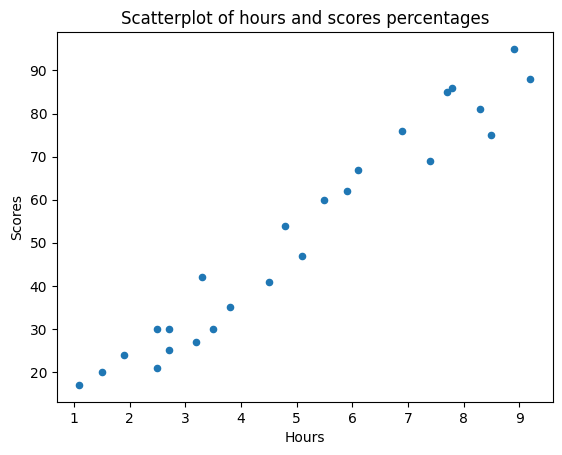

In [6]:
#plt.scatter(x=df['Hours'], y=df['Scores'])
#plt.title('Scatterplot of hours and scores percentages')

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

As the hours increase, so do the scores. There's a fairly high positive correlation here! Since the shape of the line the points are making appears to be straight - we say that there's a positive linear correlation between the Hours and Scores variables. How correlated are they? The `corr()` method calculates and displays the correlations between numerical variables in a `DataFrame`:

In [7]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In this table, Hours and Hours have a `1.0` (100%) correlation, just as Scores have a 100% correlation to Scores, naturally. Any variable will have a 1:1 mapping with itself! However, the correlation between Scores and Hours is `0.97`. Anything above `0.8` is considered to be a strong positive correlation.

In [8]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


Linear Regression Theory
------------------------

Our variables express a linear relationship. We can intuitively guesstimate the score percentage based on the number of hours studied. However, can we define a more formal way to do this? We could trace a line in between our points and read the value of "Score" if we trace a vertical line from a given value of "Hours":

![Study hours and test scores plot](https://s3.amazonaws.com/stackabuse/media/linear-regression-python-scikit-learn-1.png)

The equation that describes any straight line is:\
y=a∗x+b
In this equation, `y` represents the score percentage, `x` represents the hours studied. `b` is where the line starts at the Y-axis, also called the Y-axis intercept and `a` defines if the line is going to be more towards the upper or lower part of the graph (the angle of the line), so it is called the slope of the line.

> By adjusting the slope and intercept of the line, we can move it in any direction. Thus - by figuring out the slope and intercept values, we can adjust a line to fit our data!

That's it! That's the heart of linear regression and an algorithm really only figures out the values of the slope and intercept. It uses the values of `x` and `y` that we already have and varies the values of `a` and `b`. By doing that, it fits multiple lines to the data points and returns the line that is closer to all the data points, or the best fitting line. By modeling that linear relationship, our regression algorithm is also called a model. In this process, when we try to determine, or *predict* the percentage based on the hours, it means that our `y` variable depends on the values of our `x` variable.

Note: In Statistics, it is customary to call `y` the *dependent* variable, and `x` the *independent* variable. In Computer Science, `y` is usually called *target*, *label*, and `x` *feature*, or *attribute*. You will see that the names interchange, keep in mind that there is usually a variable that we want to predict and another used to find it's value. It's also a convention to use capitalized `X` instead of lower case, in both Statistics and CS.

Linear Regression with Python's Scikit-Learn
--------------------------------------------

Now, we can divide our data in two arrays - one for the dependent feature and one for the independent, or target feature. Since we want to predict the score percentage depending on the hours studied, our `y` will be the *"Score"* column and our `X` will the *"Hours"* column.

To separate the target and features, we can attribute the dataframe column values to our `y` and `X` variables:

In [9]:
X1 = df['Hours'].values
print(X1)
X2 = df['Hours'].values.reshape(-1, 1)
print(X2)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

In [11]:
print('X shape:', X.shape)
print('X:', X)

X shape: (25, 1)
X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


Note: `df['Column_Name']` returns a pandas `Series`. Some libraries can work on a `Series` just as they would on a NumPy array, but not all libraries have this awareness. In some cases, you'll want to extract the underlying NumPy array that describes your data. This is easily done via the `values` field of the `Series`.

Scikit-Learn's linear regression model expects a 2D input, and we're really offering a 1D array if we just extract the values:

In [12]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


It expects a 2D input because the `LinearRegression()` class expects entries that may contain more than a single value (but can also be a single value). In either case - it has to be a 2D array, where each element (hour) is actually a 1-element array.

We could already feed our `X` and `y` data directly to our linear regression model, but if we use all of our data at once, how can we know if our results are any good? Just like in learning, what we will do, is use a part of the data to train our model and another part of it, to test it.

This is easily achieved through the helper `train_test_split()` method, which accepts our `X` and `y` arrays (also works on `DataFrame`s and splits a single `DataFrame` into training and testing sets), and a `test_size`. The `test_size` is the percentage of the overall data we'll be using for testing:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

The method randomly takes samples respecting the percentage we've defined, but respects the X-y pairs, lest the sampling would totally mix up the relationship. Some common train-test splits are *80/20* and *70/30*.

In [14]:
print(y_train)

[[35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(17, 17, 8, 8)

### Training a Linear Regression Model

We have our train and test sets ready. Scikit-Learn has a plethora of model types we can easily import and train, `LinearRegression` being one of them.

And, we also need to fit the line to our data, we will do that by using the `.fit()` method along with our `X_train` and `y_train` data:

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

If no errors are thrown - the regressor found the best fitting line! The line is defined by our features and the intercept/slope. In fact, we can inspect the intercept and slope by printing the `regressor.intecept_` and `regressor.coef_` attributes, respectively:

In [25]:
regressor.intercept_

array([2.79419668])

For retrieving the slope (which is also the coefficient of x):

In [26]:
regressor.coef_

array([[9.71054094]])

This can quite literally be plugged in into our formula from before:

score= (9.68207815∗hours)+ (2.82689235) 

Let's check real quick whether this aligns with our guesstimation:

hours=5
score=9.68207815∗hours+2.82689235
score=51.2672831

With 5 hours of study, you can expect around 51% as a score! Another way to interpret the intercept value is - if a student studies one hour more than they previously studied for an exam, they can expect to have an increase of *9.68%* considering the score percentage that they had previously achieved.

> In other words, the slope value shows *what happens to the dependent variable* whenever there is an *increase (or decrease)* of *one unit of the independent variable*.

### Making Predictions

To avoid running calculations ourselves, we could write our own formula that calculates the value:

In [18]:
def calc(slope, intercept, hours):
    return slope*hours+intercept
    # y=mx + c [c= intercept, m=slope/coefficient]

In [19]:
hoursinput = float(input("How many hours do you study at home? "))

score = calc(regressor.coef_, regressor.intercept_, hoursinput)
print(score)

How many hours do you study at home?  6


[[61.0574423]]


However - a much handier way to *predict* new values using our model is to call on the `predict()` function:

In [20]:
score = regressor.predict([[9.5]])
print(score)

[[95.04433557]]


Our result is `94.80663482`, or approximately *95%*. Now we have a score percentage estimate for each and every hour we can think of. But can we trust those estimates? In the answer to that question is the reason why we split the data into train and test in the first place. Now we can predict using our test data and compare the predicted with our actual results - the *ground truth* results.

To make predictions on the test data, we pass the `X_test` values to the `predict()` method. We can assign the results to the variable `y_pred`:

In [21]:
y_pred = regressor.predict(X_test)

The `y_pred` variable now contains all the predicted values for the input values in the `X_test`. We can now compare the actual output values for `X_test` with the predicted values, by arranging them side by side in a dataframe structure:

In [22]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.391686
1      30  27.070549
2      21  27.070549
3      76  69.796929
4      62  60.086388
5      25  29.012657
6      42  34.838982
7      47  52.317955


Though our model seems not to be very precise, the predicted percentages are close to the actual ones. Let's quantify the difference between the actual and predicted values to gain an objective view of how it's actually performing.

### Evaluating the Model

After looking at the data, seeing a linear relationship, training and testing our model, we can understand how well it predicts by using some *metrics*. For regression models, three *evaluation metrics* are mainly used:

1.  Mean Absolute Error (MAE): When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.

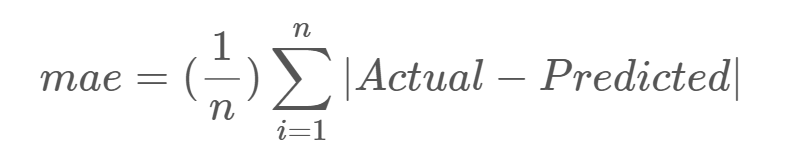

Note: You may also encounter the `y` and `ŷ` notation in the equations. The `y` refers to the actual values and the `ŷ` to the predicted values.

1.  Mean Squared Error (MSE): It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.

![image.png](https://suboptimal.wiki/images/mse_5.jpg)

1.  Root Mean Squared Error (RMSE): Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error. It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. The closer to 0, the better as well.

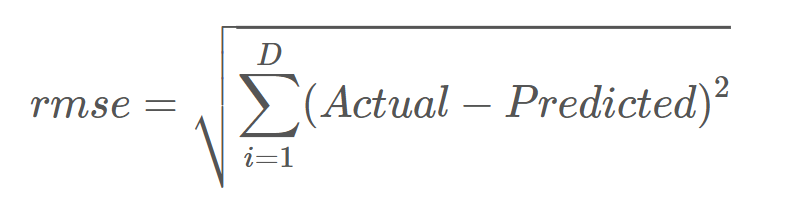

We can use any of those three metrics to *compare* models (if we need to choose one). We can also compare the same regression model with different argument values or with different data and then consider the evaluation metrics. This is known as *hyperparameter tuning* - tuning the hyperparameters that influence a learning algorithm and observing the results.

When choosing between models, the ones with the smallest errors usually perform better. When monitoring models, if the metrics got worse, then a previous version of the model was better, or there was some significant alteration in the data for the model to perform worse than it was performing.

Luckily, we don't have to do any of the metrics calculations manually. The Scikit-Learn package already comes with functions that can be used to find out the values of these metrics for us. Let's find the values for these metrics using our test data. First, we will import the necessary modules for calculating the MAE and MSE errors. Respectively, the `mean_absolute_error` and `mean_squared_error`:

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [26]:
print(f'Mean absolute error: {mae:.3f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4.500
Mean squared error: 23.62
Root mean squared error: 4.86


Multiple Linear Regression
--------------------------

Until this point, we have predicted a value with linear regression using only one variable. There is a different scenario that we can consider, where we can predict using *many variables* instead of one, and this is also a much more common scenario in real life, where many things can affect some result.

For instance, if we want to predict the gas consumption in US states, it would be limiting to use only one variable, for instance, gas taxes to do it, since more than just gas taxes affects consumption. There are more things involved in the gas consumption than only gas taxes, such as the per capita income of the people in a certain area, the extension of paved highways, the proportion of the population that has a driver's license, and many other factors. Some factors affect the consumption more than others - and here's where correlation coefficients really help!

In a case like this, when it makes sense to use multiple variables, linear regression becomes a multiple linear regression.

> Note: Another nomenclature for the linear regression with one independent variable is *univariate* linear regression. And for the multiple linear regression, with many independent variables, is *multivariate* linear regression.

Usually, real world data, by having much more variables with greater values range, or more variability, and also complex relationships between variables - will involve multiple linear regression instead of a simple linear regression.

> That is to say, on a day-to-day basis, if there is linearity in your data, you will probably be applying a multiple linear regression to your data.

### Exploratory Data Analysis

To get a practical sense of multiple linear regression, let's keep working with our gas consumption example, and use a dataset that has gas consumption data on 48 US States.

In [9]:
df = pd.read_csv('./data/petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [27]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [28]:
print(df.describe().round(2).T)

        count   mean    std   min   25%   50%   75%   max
Hours    25.0   5.01   2.53   1.1   2.7   4.8   7.4   9.2
Scores   25.0  51.48  25.29  17.0  30.0  47.0  75.0  95.0


By looking at the *min* and *max* columns of the describe table, we see that the minimum value in our data is `0.45`, and the maximum value is `17,782`. This means that our data range is `17,781.55` (17,782 - 0.45 = 17,781.55), very wide - which implies our data variability is also high.

Also, by comparing the values of the *mean* and *std* columns, such as `7.67` and `0.95`, `4241.83` and `573.62`, etc., we can see that the means are really far from the standard deviations. That implies our data is far from the mean, *decentralized* - which also adds to the variability.

We already have two indications that our data is spread out, which is not in our favor, since it makes it more difficult to have a line that can fit from 0.45 to 17,782 - in statistical terms, to *explain that variability*.

Either way, it is always important that we plot the data. Data with different shapes (relationships) can have the same descriptive statistics. So, let's keep going and look at our points in a graph.

The Seaborn plot we are using is `regplot`, which is short from regression plot. It is a scatterplot that already plots the scattered data along with the regression line. If you'd rather look at a scatterplot without the regression line,

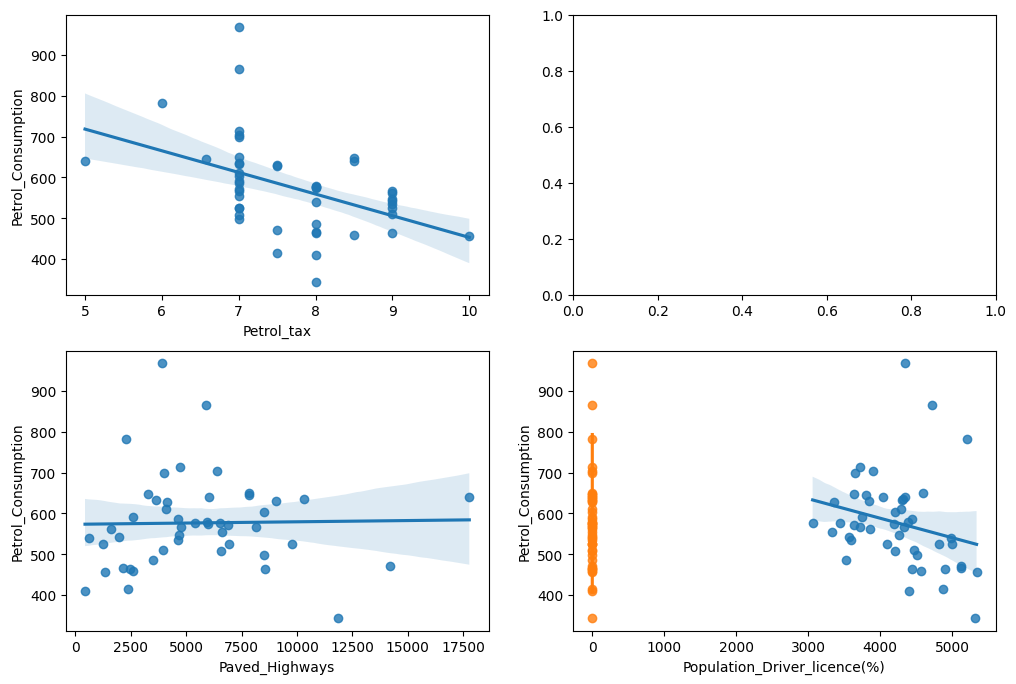

In [32]:
import seaborn as sns # Convention alias for Seaborn

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, var in enumerate(variables):
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df, ax=ax[int(np.ceil(index/4))][int(np.mod(index, 2))])

When looking at the reg plots, it seems the `Petrol_tax` and `Average_income` have a weak negative linear relationship with `Petrol_Consumption`. It also seems that the `Population_Driver_license(%)` has a strong positive linear relationship with `Petrol_Consumption`, and that the `Paved_Highways` variable has no relationship with `Petrol_Consumption`.

We can also calculate the correlation of the new variables, this time using Seaborn's `heatmap()` to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

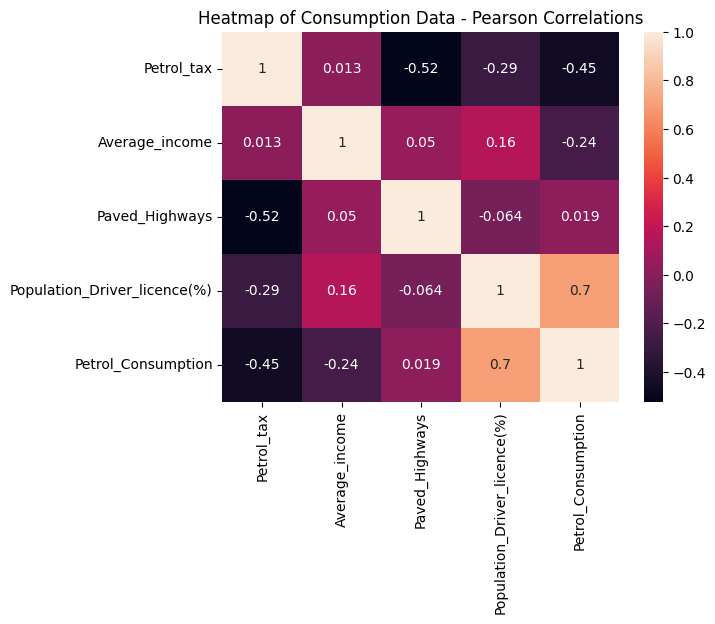

In [33]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

It seems that the heat map corroborates our previous analysis! `Petrol_tax` and `Average_income` have a weak negative linear relationship of, respectively, `-0.45` and `-0.24` with `Petrol_Consumption`. `Population_Driver_license(%)` has a strong positive linear relationship of `0.7` with `Petrol_Consumption`, and `Paved_Highways` correlation is of `0.019` - which indicates no relationship with `Petrol_Consumption`.

> The correlation doesn't imply causation, but we might find causation if we can successfully explain the phenomena with our regression model.

Another important thing to notice in the reg plots is that there are some points really far off from where most points concentrate, we were already expecting something like that after the big difference between the mean and std columns - those points might be data outliers and extreme values.

> Note: Outliers and extreme values have different definitions. While outliers don't follow the natural direction of the data, and drift away from the shape it makes - extreme values are in the same direction as other points but are either too high or too low in that direction, far off to the extremes in the graph.

> A linear regression model, either uni or multivariate, will take these outlier and extreme values into account when determining the slope and coefficients of the regression line. Considering what the already know of the linear regression formula:

𝑠𝑐𝑜𝑟𝑒 = (9.68207815∗ℎ𝑜𝑢𝑟𝑠) + 2.82689235

If we have an outlier point of 200 hours, that might have been a typing error - it will still be used to calculate the final score:

score = (9.68207815∗200) + 2.82689235 
score=1939.24252235

Just one outlier can make our slope value 200 times bigger. The same holds for multiple linear regression. The multiple linear regression formula is basically an extension of the linear regression formula with more slope values:

y=b0+b1∗x1+b2∗x2+b3∗x3+...+bn∗xn

The main difference between this formula from our previous one, is that it describes as plane, instead of describing a line. We know have bn * xn coefficients instead of just a * x.

> Note: There is an error added to the end of the multiple linear regression formula, which is an error between predicted and actual values - or residual error. This error usually is so small, it is omitted from most formulas:

y=b0+b1∗x1+b2∗x2+b3∗x3+...+bn∗xn+ϵ

In the same way, if we have an extreme value of 17,000, it will end up making our slope 17,000 bigger:

y=b0+17,000∗x1+b2∗x2+b3∗x3+...+bn∗xn

> In other words, univariate and multivariate linear models are *sensitive* to outliers and extreme data values.

We have learned a lot about linear models and exploratory data analysis, now it's time to use the `Average_income`, `Paved_Highways`, `Population_Driver_license(%)` and `Petrol_tax` as independent variables of our model and see what happens.

### Preparing the Data

Following what has been done with the simple linear regression, after loading and exploring the data, we can divide it into features and targets. The main difference is that now our features have 4 columns instead of one.

We can use double brackets `[[ ]]` to select them from the dataframe:

In [37]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [40]:
X.shape # (48, 4)

(48, 4)

In [41]:
X_train.shape, X_test.shape

((38, 4), (10, 4))

To train our model we can execute the same code as before, and use the `fit()` method of the `LinearRegression` class:

In [42]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
regressor.intercept_

360.1499125671512

In [48]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

Those four values are the coefficients for each of our features in the same order as we have them in our `X` data. To see a list with their names, we can use the dataframe `columns` attribute:

In [34]:
feature_names = X.columns

Considering it is a little hard to see both features and coefficients together like this, we can better organize them in a table format.

To do that, we can assign our column names to a feature_names variable, and our coefficients to a model_coefficients variable. After that, we can create a dataframe with our features as an index and our coefficients as column values called coefficients_df:

In [35]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


If in the linear regression model, we had 1 variable and 1 coefficient, now in the multiple linear regression model, we have 4 variables and 4 coefficients. What can those coefficients mean? Following the same interpretation of the coefficients of the linear regression, this means that for a unit increase in the average income, there is a decrease of 0.06 dollars in gas consumption.

Similarly, for a unit increase in paved highways, there is a 0.004 decrease in miles of gas consumption; and for a unit increase in the proportion of population with a driver's license, there is an increase of 1,346 billion gallons of gas consumption.

And, lastly, for a unit increase in petrol tax, there is a decrease of 36,993 million gallons in gas consumption.

By looking at the coefficients dataframe, we can also see that, according to our model, the `Average_income` and `Paved_Highways` features are the ones that are closer to 0, which means they have have the least impact on the gas consumption. While the `Population_Driver_license(%)` and `Petrol_tax`, with the coefficients of 1,346.86 and -36.99, respectively, have the biggest impact on our target prediction.

In other words, the gas consumption is mostly explained by the percentage of the population with driver's license and the petrol tax amount, surprisingly (or unsurprisingly) enough.

We can see how this result has a connection to what we had seen in the correlation heatmap. The driver's license percentual had the strongest correlation, so it was expected that it could help explain the gas consumption, and the petrol tax had a weak negative correlation - but, when compared to the average income that also had a weak negative correlation - it was the negative correlation which was closest to -1 and ended up explaining the model.

When all the values were added to the multiple regression formula, the paved highways and average income slopes ended up becoming closer to 0, while the driver's license percentual and the tax income got further away from 0. So those variables were taken more into consideration when finding the best fitted line.

> Note: In data science we deal mostly with hypotheses and uncertainties. The is no 100% certainty and there's always an error. *If you have 0 errors or 100% scores, get suspicious.* We have trained only one model with a sample of data, it is too soon to assume that we have a final result. To go further, you can perform residual analysis, train the model with different samples using a cross validation technique. You could also get more data and more variables to explore and plug in the model to compare results.

It seems our analysis is making sense so far. Now it is time to determine if our current model is prone to errors.

### Making Predictions with the Multivariate Regression Model

To understand if and how our model is making mistakes, we can predict the gas consumption using our test data and then look at our metrics to be able to tell how well our model is behaving.

In the same way we had done for the simple regression model, let's predict with the test data:

In [44]:
y_pred = regressor.predict(X_test)

Now, that we have our test predictions, we can better compare them with the actual output values for `X_test` by organizing them in a `DataFrame`format:

In [45]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
26     577  594.993537
44     782  655.821813
7      467  473.324093
39     968  699.315011
36     640  657.747616
46     610  644.023640
20     649  675.661985
29     534  493.754256
19     640  674.650227
8      464  503.094575


Here, we have the index of the row of each test data, a column for its actual value and another for its predicted values. When we look at the difference between the actual and predicted values, such as between 631 and 607, which is 24, or between 587 and 674, that is -87 it seems there is some distance between both values, but is that distance too much?

### Evaluating the Multivariate Model

After exploring, training and looking at our model predictions - our final step is to evaluate the performance of our multiple linear regression. We want to understand if our predicted values are too far from our actual values. We'll do this in the same way we had previously done, by calculating the MAE, MSE and RMSE metrics.

So, let's execute the following code:

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 61.16
Mean squared error: 9500.85
Root mean squared error: 97.47


We can see that the value of the RMSE is 63.90, which means that our model might get its prediction wrong by adding or subtracting 63.90 from the actual value. It would be better to have this error closer to 0, and 63.90 is a big number - this indicates that our model might not be predicting very well.

Our MAE is also distant from 0. We can see a significant difference in magnitude when compared to our previous simple regression where we had a better result.

To dig further into what is happening to our model, we can look at a metric that measures the model in a different way, it doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more general approach to the error, the R^2:
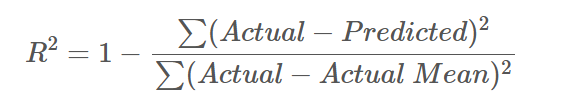

The R^2 doesn't tell us about how far or close each predicted value is from the real data - it tells us how much of our target is being captured by our model.

> In other words, R^2 quantifies how much of the variance of the dependent variable is being explained by the model.

The R^2 metric varies from 0% to 100%. The closer to 100%, the better. If the R^2 value is negative, it means it doesn't explain the target at all.

We can calculate R^2 in Python to get a better understanding of how it works:

In [39]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R square error:', r2)

R square error: 0.391366400143053


R^2 also comes implemented by default into the score method of Scikit-Learn's linear regressor class. We can calculate it like this:

In [40]:
regressor.score(X_test, y_test)

0.391366400143053

So far, it seems that our current model explains only 39% of our test data which is not a good result, it means it leaves 61% of the test data unexplained.

Let's also understand how much our model explains of our train data:

In [41]:
regressor.score(X_train, y_train)

0.7068781342155137

We have found an issue with our model. It explains 70% of the train data, but only 39% of our test data, which is more important to get right than our train data. It is fitting the train data really well, and not being able to fit the test data - which means, we have an overfitted multiple linear regression model.

There are many factors that may have contributed to this, a few of them could be:

1.  Need for more data: we have only one year worth of data (and only 48 rows), which isn't that much, whereas having multiple years of data could have helped improve the prediction results quite a bit.
2.  Overcome overfitting: we can use a cross validation that will fit our model to different shuffled samples of our dataset to try to end overfitting.
3.  Assumptions that don't hold: we have made the assumption that the data had a linear relationship, but that might not be the case. Visualizing the data using boxplots, understanding the data distribution, treating the outliers, and normalizing it may help with that.
4.  Poor features: we might need other or more features that have stronger relationships with values we are trying to predict.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
# Features and target variable
X = df[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_tax']]
y = df['Petrol_Consumption']


In [ ]:
X.head()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

In [21]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7092.563070000002


In [28]:
X_test.head(2)

Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [29]:
# Example prediction
avginc = float(input("Enter your Average Income: "))
pvhs = float(input("Enter the paved highways: "))
pdl = float(input("Enter the percentage of driver's license: "))
ptx = float(input("Enter the petrol tax rate: "))

example_data = [ [avginc, pvhs, pdl, ptx] ] 
predicted_score = rf.predict(example_data)
print(f'Predicted Consumption: {predicted_score[0]}')

Enter your Average Income:  7000
Enter the paved highways:  5000
Enter the percentage of driver's license:  0.65
Enter the petrol tax rate:  4


Predicted Consumption: 577.12


C:\Users\diwas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
